# Analise dos dados da Covid19 no Brasil ate o dia 17-02-2021

### Alunos: Tais de Oliveira Silva, Janeci Leoni Dewes, Diego Valentim Rocha

Dados coletados no site: https://covid.saude.gov.br/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Carregar os dados 
dados = pd.read_csv('dados.csv', error_bad_lines=False, sep=';', parse_dates = ['data'])

### Abaixo desenvolvemos uma breve analise exploratoria, podendo assim entender um pouco melhor o nosso conjunto de dados. 

In [3]:
dados.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [4]:
dados.shape

(2001234, 17)

In [5]:
dados.dtypes

regiao                            object
estado                            object
municipio                         object
coduf                              int64
codmun                           float64
codRegiaoSaude                   float64
nomeRegiaoSaude                   object
data                      datetime64[ns]
semanaEpi                          int64
populacaoTCU2019                 float64
casosAcumulado                     int64
casosNovos                         int64
obitosAcumulado                    int64
obitosNovos                        int64
Recuperadosnovos                 float64
emAcompanhamentoNovos            float64
interior/metropolitana           float64
dtype: object

In [6]:
# Definir a col Data como indice da tabela 
dados.set_index('data', inplace = True)

In [7]:
dados.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2020-02-25,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,0,0,0,0,NaN,NaN,NaN
2020-02-26,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2020-02-27,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1,0,0,0,NaN,NaN,NaN
2020-02-28,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1,0,0,0,NaN,NaN,NaN
2020-02-29,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [8]:
dados.tail()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2021-03-13,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,10,3015268.0,316181,1660,5097,15,NaN,NaN,1.0
2021-03-14,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,11,3015268.0,317880,1699,5116,19,NaN,NaN,1.0
2021-03-15,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,11,3015268.0,319936,2056,5145,29,NaN,NaN,1.0
2021-03-16,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,11,3015268.0,321365,1429,5176,31,NaN,NaN,1.0
2021-03-17,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,11,3015268.0,322686,1321,5206,30,NaN,NaN,1.0


In [9]:
dados.count()

regiao                    2001234
estado                    2000845
municipio                 1982920
coduf                     2001234
codmun                    1990396
codRegiaoSaude            1982920
nomeRegiaoSaude           1982920
semanaEpi                 2001234
populacaoTCU2019          1993758
casosAcumulado            2001234
casosNovos                2001234
obitosAcumulado           2001234
obitosNovos               2001234
Recuperadosnovos              334
emAcompanhamentoNovos         334
interior/metropolitana    1982920
dtype: int64

In [10]:
# Verificar se existem valores ausentes:
dados.isnull().sum()

regiao                          0
estado                        389
municipio                   18314
coduf                           0
codmun                      10838
codRegiaoSaude              18314
nomeRegiaoSaude             18314
semanaEpi                       0
populacaoTCU2019             7476
casosAcumulado                  0
casosNovos                      0
obitosAcumulado                 0
obitosNovos                     0
Recuperadosnovos          2000900
emAcompanhamentoNovos     2000900
interior/metropolitana      18314
dtype: int64

### Excluir algumas colunas que nao serao usadas

In [16]:
del dados['coduf']

In [17]:
del dados['codmun']

In [18]:
del dados['codRegiaoSaude']

In [20]:
del dados['nomeRegiaoSaude']

In [21]:
del dados['semanaEpi']

In [22]:
del dados['populacaoTCU2019']

In [26]:
dados.tail()

,regiao,estado,municipio,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,
2021-03-13,Centro-Oeste,DF,Brasília,316181,1660,5097,15,NaN,NaN,1.0
2021-03-14,Centro-Oeste,DF,Brasília,317880,1699,5116,19,NaN,NaN,1.0
2021-03-15,Centro-Oeste,DF,Brasília,319936,2056,5145,29,NaN,NaN,1.0
2021-03-16,Centro-Oeste,DF,Brasília,321365,1429,5176,31,NaN,NaN,1.0
2021-03-17,Centro-Oeste,DF,Brasília,322686,1321,5206,30,NaN,NaN,1.0


### 1- Queremos visualizar a distribuicao dos casos acumulados no Brasil para o periodo 

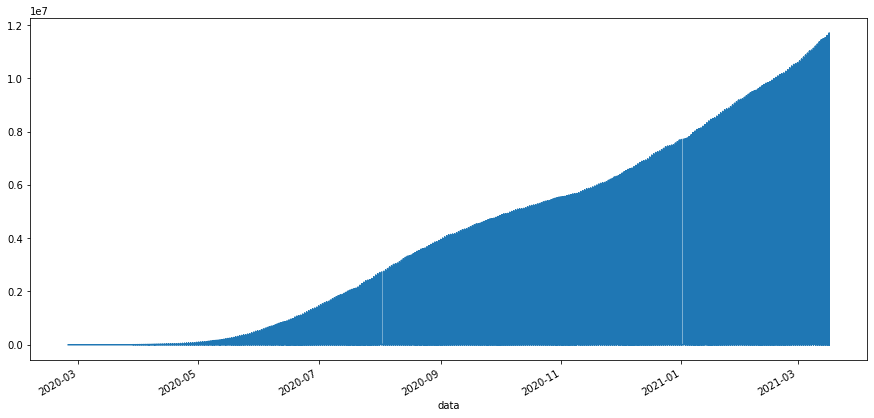

In [52]:
# Casos acumulados durante o periodo
dados['casosAcumulado'].plot(figsize=(15,7))

### 2 - Queremos visualizar a distribuicao dos obitos acumulados no Brasil para o periodo

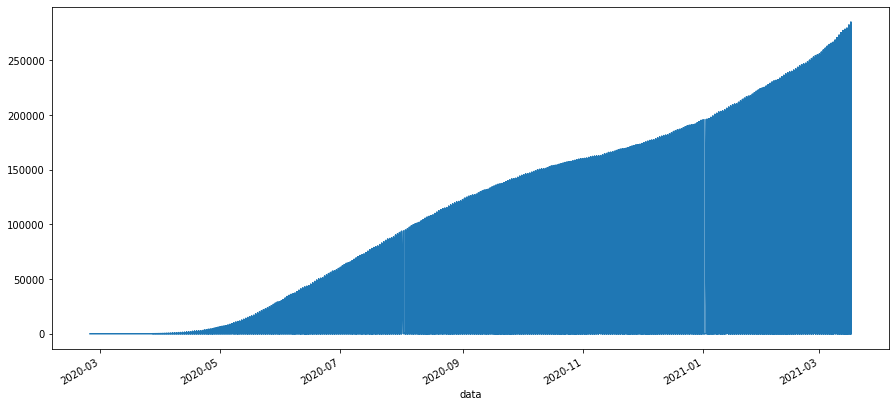

In [45]:
# Obitos acumulados durante o periodo
dados['2020-02-25' : '2021-03-17']['obitosAcumulado'].plot(figsize=(15,7))

### 3 - Queremos a visualizacao das duas informacoes, para isso precisamos criar um dataframe com a combinacao das colunas de casos e obitos acumulados no Brasil para o periodo

In [53]:
# Criar um df vazio
combine = pd.DataFrame(index=dados.index)
combine.head()

""
data
2020-02-25
2020-02-26
2020-02-27
2020-02-28
2020-02-29


In [48]:
combine['Casos'] = dados['casosAcumulado']

In [49]:
combine['Obitos'] = dados['obitosAcumulado']

In [50]:
combine.head()

,Casos,Obitos
data,,
2020-02-25,0,0
2020-02-26,1,0
2020-02-27,1,0
2020-02-28,1,0
2020-02-29,2,0


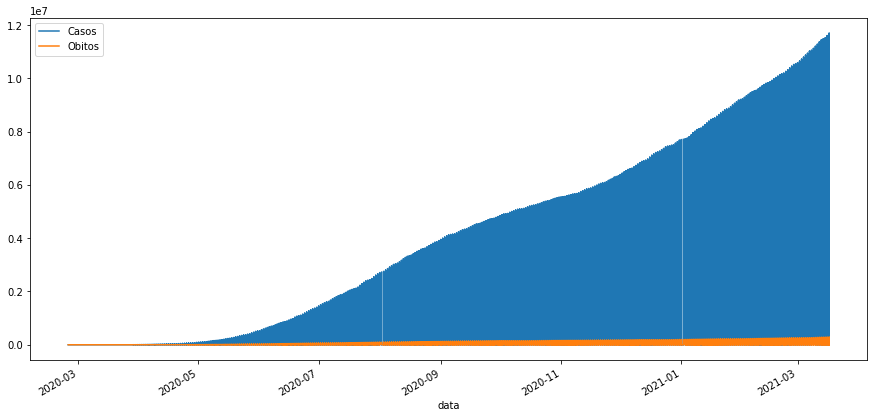

In [51]:
combine.plot(figsize=(15,7))

### 4 - Queremos saber de qual regiao vem o maior numero de registros reportados

Text(0.5, 1, 'Contagem do total de registros reportados por regiao')

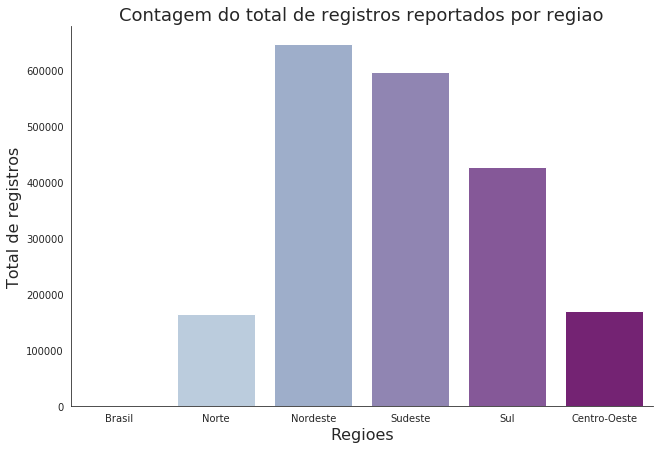

In [72]:
# Numero de registros por regiao
sns.set_style("white")
g = sns.catplot(x="regiao", data=dados, kind="count", palette="BuPu", height=6, aspect=1.5)
g.ax.xaxis.set_label_text("Regioes",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total de registros", fontdict= {'size':16})
g.ax.set_title("Contagem do total de registros reportados por regiao",fontdict= {'size':18})

### 5 - Queremos visualizar a distribuicao dos obitos para os primeiros tres meses do ano de 2021

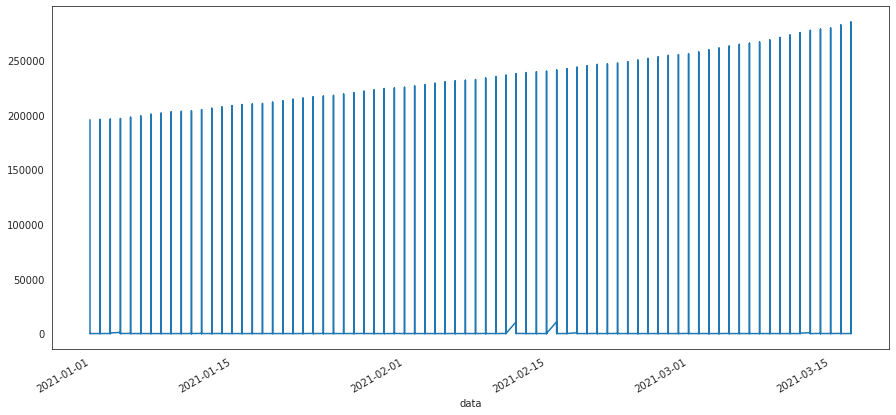

In [80]:
# Aplicar o filtro pela data
dados['2021-01':'2021-03']['obitosAcumulado'].plot(figsize=(15,7))

### 1 - Para trabalhos futuros iremos separar os dados e fazer analises por regioes, estados e cidades,  para assim compreender melhor como o virus da Covid19 tem se manifestado no País. 

### 2 - Pretendemos utilizar historamas para a distribuicao de novos casos reportados, visualizar quais cidades do País estao sendo mais afetadas e fazer um comparativo entre a quantidade de pessoas infectadas dessas cidades e sua populacao total.  

# Fim